In [20]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [21]:
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [22]:
dfTodos = pd.read_csv("aluno_quant_Materias.csv", index_col=0)
dfCotista = pd.read_csv("aluno_quant_Materias_cotistas.csv", index_col=0)
dfNaoCostista = pd.read_csv("aluno_quant_Materias_nao_cotistas.csv", index_col=0)
dfCotista = dfCotista[dfCotista["Ingresso_unb"] > 20131]
dfNaoCostista = dfNaoCostista[dfNaoCostista["Ingresso_unb"] > 20131]
dfTodos = dfTodos[dfTodos["Ingresso_unb"] > 20131]

In [23]:
undropableCol = ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola","Ingresso_unb"]
dropVal = 1
dropValAll = 30
dfCotista.drop([col for col, val in dfCotista.sum().iteritems() if val < dropValAll and col not in undropableCol], axis=1, inplace=True)
dfNaoCostista.drop([col for col, val in dfNaoCostista.sum().iteritems() if val < dropValAll and col not in undropableCol], axis=1, inplace=True)
dfTodos.drop([col for col, val in dfTodos.sum().iteritems() if val < dropValAll and col not in undropableCol], axis=1, inplace=True)


In [24]:
disciplinas = list(dfCotista.columns[7:]) #- ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
serieCotistas = pd.Series(index = disciplinas, dtype=float)
# disciplinas

somaDiciplinas = dfCotista.sum()
for diciplina in disciplinas:
    diciplinasAluno  = dfCotista[dfCotista[str(diciplina)]>0].count()
    serieCotistas[diciplina] = somaDiciplinas[str(diciplina)]/diciplinasAluno[0]

In [25]:
disciplinas = list(dfNaoCostista.columns[7:]) #- ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
serieNaoCotistas = pd.Series(index = disciplinas, dtype=float)
# disciplinas

somaDiciplinas = dfNaoCostista.sum()
for diciplina in disciplinas:
#     print (type(d))
    diciplinasAluno  = dfNaoCostista[dfNaoCostista[str(diciplina)]>0].count()
    serieNaoCotistas[diciplina] = somaDiciplinas[str(diciplina)]/diciplinasAluno[0]

In [26]:
disciplinas = list(dfTodos.columns[7:]) #- ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
serieTodos = pd.Series(index = disciplinas, dtype=float)
# disciplinas

somaDiciplinas = dfTodos.sum()
for diciplina in disciplinas:
#     print (type(d))
    diciplinasAluno  = dfTodos[dfTodos[str(diciplina)]>0].count()
    serieTodos[diciplina] = somaDiciplinas[str(diciplina)]/diciplinasAluno[0]

In [27]:
filteredDisciplinas = serieTodos[serieTodos>1.25].index.tolist()
xAxis = ['_'+ x + '_' for x in filteredDisciplinas]

In [28]:
serieNaoCotistas[filteredDisciplinas]


dataNaoCotista = go.Bar(
        x = xAxis,
        y = serieNaoCotistas[filteredDisciplinas],
        name='Non-Quota'
    )


dataCotista = go.Bar(
        x = xAxis,
        y = serieCotistas[filteredDisciplinas],
        name='Quota'
    )

data = [dataNaoCotista, dataCotista]
layout = go.Layout(
    title='Enrollment Rate per Student by Subject',
    xaxis=dict(
        title='Subject Code',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Enrollment Rate per Student',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='dados')

In [29]:
usableCols = ['saiu']

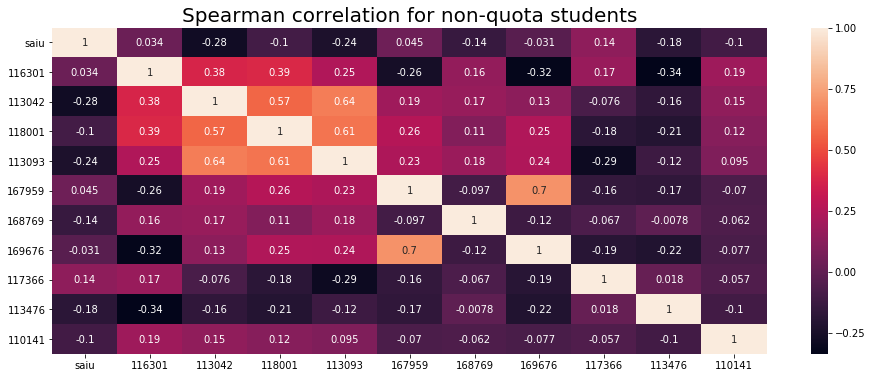

In [40]:
f = dfNaoCostista[usableCols + filteredDisciplinas]
# newColumns = list(f.columns)
# newColumns[0] = 'Exit Form'
# f.columns = newColumns
f = f.corr('spearman')
plt.figure(figsize=(16, 6))
plt.title('Spearman correlation for non-quota students', fontsize = 20)
sns.heatmap(f, annot=True)
plt.savefig('corrNonQuota.png')

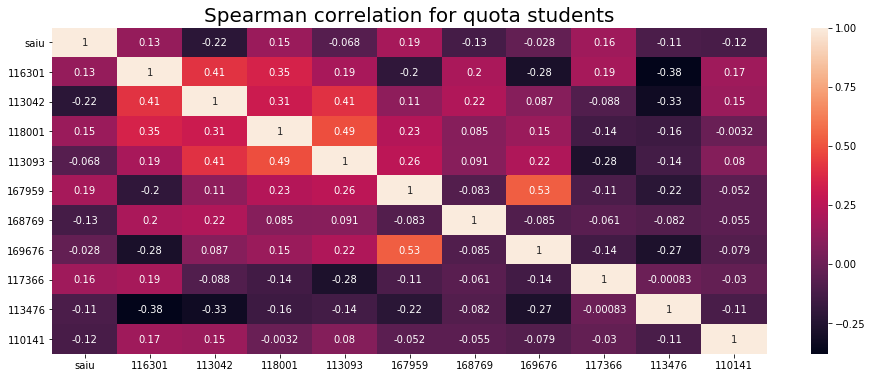

In [39]:
f = dfCotista[usableCols + filteredDisciplinas]
# newColumns = list(f.columns)
# newColumns[0] = 'Exit Form'
# f.columns = newColumns
f = f.corr('spearman')
plt.figure(figsize=(16, 6))
plt.title('Spearman correlation for quota students', fontsize = 20)
sns.heatmap(f, annot=True)
plt.savefig('corrQuota.png')

In [32]:
##############################################      evasão        ##################################################
####################################################################################################################
dfEvavao = pd.read_csv('dados_filtrados_v4.csv')
dfEvasao_cotista = dfEvavao[dfEvavao['Cotista'] == 1]
dfEvasao_cotista = dfEvasao_cotista[(dfEvasao_cotista['semestre'] <= 15) & (dfEvasao_cotista['semestre'] >= 0)]
dfEvasao_cotista = dfEvasao_cotista[(dfEvasao_cotista['semestre']*10 % 10 == 0)]
dfEvasao_nao_cotista = dfEvavao[dfEvavao['Cotista'] == 0]
dfEvasao_nao_cotista = dfEvasao_nao_cotista[(dfEvasao_nao_cotista['semestre'] <= 15) & (dfEvasao_nao_cotista['semestre'] >= 0)]
dfEvasao_nao_cotista = dfEvasao_nao_cotista[(dfEvasao_nao_cotista['semestre']*10 % 10 == 0)]

In [33]:
def displayEvasao(df):
    alunos = df["ID Aluno"].unique()
    semestres = df['semestre'].unique()
    semestres.sort()
    c = np.zeros((len(semestres), 3))
    for i, semestre in enumerate(semestres):
        c[i] = np.array([semestre, 0, 0])
    for aluno in alunos:
        b = df[df["ID Aluno"]==aluno]
        semesterList = b["semestre"].unique()
        for semester in semesterList:
            c[np.argwhere(c[:,0] == semester), 2] +=1
        a = b.iloc[0]
        if a["saiu"] == 1:
            d = b["semestre"].max()        
            c[np.argwhere(c[:,0] == d), 1] +=1
    dataFrame = pd.DataFrame(data={'total': c[:,2], 'desistiu': c[:,1], 'semestre': c[:,0]})
    return dataFrame

In [34]:
frameNaoCotista = displayEvasao(dfEvasao_nao_cotista)
frameCotista = displayEvasao(dfEvasao_cotista)

In [35]:
resultNaoCostista = frameNaoCotista['desistiu'] / frameNaoCotista['total']
resultCostista = frameCotista['desistiu'] / frameCotista['total']

dataNaoCotista = go.Scatter(
        x = frameNaoCotista['semestre'],
        y = resultNaoCostista,
        name='Non-Quota'
    )


dataCotista = go.Scatter(
        x = frameCotista['semestre'],
        y = resultCostista,
        name='Quota'
    )

data = [dataNaoCotista, dataCotista]
layout = go.Layout(
    title='Abandonment Rate per Semster',
    xaxis=dict(
        title='Semester',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Abandonment Rate',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='dados')

###                                                                              desempenho

In [36]:
def displayDesempenho(df):
    semestres = df['semestre'].unique()
    semestres.sort()
    b = np.zeros((len(semestres), 3))
    for i, semestre in enumerate(semestres):
        a = df[df["semestre"] == semestre]
        b[i] = np.array([a[a["Menção na disciplina"] >=3]["Menção na disciplina"].count() / a["Menção na disciplina"].count(),
                         semestre, int(a["Menção na disciplina"].count())])
    dataFrame = pd.DataFrame(data={'total': b[:,2], 'desempenho': b[:,0], 'semestre': b[:,1]})
    return dataFrame

In [37]:
desempenhoCotista = displayDesempenho(dfEvasao_cotista)
desempenhoNaoCostista = displayDesempenho(dfEvasao_nao_cotista)

In [38]:
dataNaoCotista = go.Bar(
        x = desempenhoNaoCostista['semestre'],
        y = desempenhoNaoCostista['desempenho'],
        name='Non-quota'
    )


dataCotista = go.Bar(
        x = desempenhoCotista['semestre'],
        y = desempenhoCotista['desempenho'],
        name='Quota'
    )

data = [dataNaoCotista, dataCotista]
layout = go.Layout(
    title='Aproval Rate per Semster',
    xaxis=dict(
        title='Semester',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Aproval rate',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='dados')